In [1]:
# Chon ham y = e^(-x^2)


Da thuc noi suy cua bo diem da cho la: 
[-0.1111  0.      1.    ]

Da thuc noi suy cua bo diem da cho la: 
[ 2.68650000e-02 -4.44692297e-20 -3.52885000e-01  6.11557788e-19
  1.00000000e+00]

Da thuc noi suy cua bo diem da cho la: 
[-3.20543746e-04  5.48708605e-19  8.20795960e-03  2.52691104e-18
 -8.05448371e-02  8.98435142e-17  3.86494919e-01  1.81133761e-17
 -9.45937498e-01 -2.76952669e-16  1.00000000e+00]

Da thuc noi suy cua bo diem da cho la: 
[ 4.57722558e-08 -9.14389082e-20 -2.28688465e-06  3.48971284e-18
  5.05488633e-05 -5.07150453e-17 -6.52548558e-04  1.32949177e-15
  5.47053240e-03 -6.89433495e-15 -3.13295170e-02  5.92302353e-14
  1.25542315e-01 -1.27551033e-13 -3.54554731e-01  5.51533147e-13
  7.01418349e-01 -3.95850915e-13 -9.52797136e-01  2.56110644e-12
  8.52703393e-01 -1.55412051e-12 -4.44554017e-01 -6.27628113e-13
 -1.11845869e-02 -2.59563500e-12  4.76818104e-01 -4.49171899e-12
 -9.99028466e-01 -8.94785765e-12  1.00000000e+00]


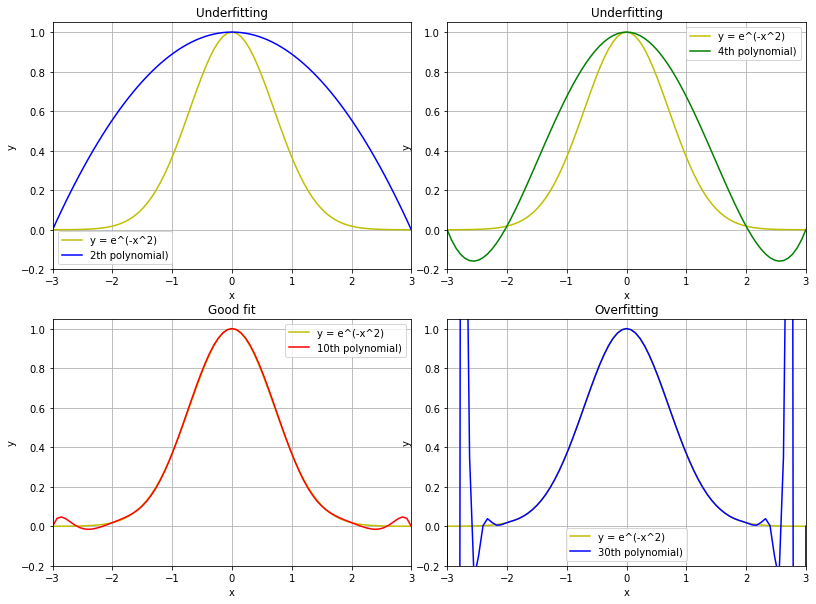

In [6]:
import numpy as np 
import matplotlib.pyplot as plt 

def HornerInverseMethod(X):
    W = np.array([])
    W = np.append(W, 1)
    W = np.append(W, -X[0])
    
    for i in np.arange(1, len(X)):             
        ithMulti = np.array([X[i] * k for k in W])
        
        W = np.append(W, 0)   
        for i in np.arange(1, len(W)): 
            W[i] = W[i] - ithMulti[i - 1]
            
    return W

def HornerMethod(P, c): 
    Q = np.array([])            
    Q = np.append(Q, P[0])    
    
    for i in np.arange(1, len(P) - 1): 
        q = P[i] + Q[i - 1] * c 
        Q = np.append(Q, q)
    
    return Q

def main(X, Y): 
    W = HornerInverseMethod(X)
    
    L = np.zeros(len(X))
    for j in np.arange(len(X)): 
        Lj = HornerMethod(W, X[j])
        if j == 0: 
            L = np.array([Lj])
        else: 
            L = np.append(L, [Lj], axis = 0)
        
    addiCoef = np.array([])
    for j in np.arange(len(X)): 
        deriWi = 1
        for i in np.arange(len(X)): 
            if X[i] == X[j]: 
                continue
            else: 
                deriWi = deriWi * (X[j] - X[i])
    
        addiCoef = np.append(addiCoef, Y[j] / deriWi)
    
    for j in np.arange(len(L)):
        L[j] = L[j] * addiCoef[j]
        
    Pn = np.zeros(len(L[0]))
    for i in np.arange(len(L)): 
        Pn = Pn + L[i]
    
    print()
    print("Da thuc noi suy cua bo diem da cho la: ")
    print(Pn)
    return Pn

def polyEval(x, Pn): 
    Q = []            
    Q.append(Pn[0])    
    for i in range(1, len(Pn)): 
        y = Pn[i] + Q[i - 1] * x 
        Q.append(y)
        
    return y

# 2th polynomial. 
X1 = np.array([-3, 0, 3])
Y1 = np.array([0.0001, 1, 0.0001])

# 4th polynomial. 
X2 = np.array([-3, -2, 0, 2, 3])
Y2 = np.array([0.0001, 0.0183, 1, 0.0183, 0.0001])

# 10th polynomial. 
X3 = np.array([-3, -2.6, -2, -1.6, -1, 0, 1, 1.6, 2, 2.6, 3])
Y3 = np.array([0.0001, 0.0012, 0.0183, 0.0773, 0.3679, 1, 0.3679, 0.0773, 0.0183, 0.0012, 0.0001])

# 30th polynomial. 
X4 = np.array([-3, -2.8, -2.6, -2.4, -2.2, -2, -1.8, -1.6, -1.4, -1.2, -1, -0.8, -0.6, 
               -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3])
Y4 = np.array([0.0001, 0.0004, 0.0012, 0.0032, 0.0079, 0.0183, 0.0392, 0.0773, 0.1406, 0.2370, 0.3679, 
               0.5273, 0.6977, 0.8521, 0.9608, 1, 0.9608, 0.8521, 0.6977, 0.5273, 0.3679, 0.2370, 0.1406, 0.0773, 
               0.0392, 0.0183, 0.0079, 0.0032, 0.0012, 0.0004, 0.0001])


Pn1 = main(X1, Y1)
Pn2 = main(X2, Y2)
Pn3 = main(X3, Y3)
Pn4 = main(X4, Y4)
    
# Ve do thi cua da thuc noi suy Lagrange. 
def f(x): 
    return np.exp(-x**2)

# plt.figure()
plt.figure(figsize=(13.5, 10))

plt.subplot(2, 2, 1)
x = np.linspace(-3, 3, 81)
y = f(x)
P1 = polyEval(x, Pn1)
plt.plot(x, y, 'y-', x, P1, 'b-')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['y = e^(-x^2)', '2th polynomial)'])
plt.title('Underfitting')
plt.axis([-3, 3, -0.2, 1.05])
plt.grid()

plt.subplot(2, 2, 2)
x = np.linspace(-3, 3, 81)
y = f(x)
P2 = polyEval(x, Pn2)
plt.plot(x, y, 'y-', x, P2, 'g-')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['y = e^(-x^2)', '4th polynomial)'])
plt.title('Underfitting')
plt.axis([-3, 3, -0.2, 1.05])
plt.grid()

plt.subplot(2, 2, 3)
x = np.linspace(-3, 3, 81)
y = f(x)
P3 = polyEval(x, Pn3)
plt.plot(x, y, 'y-', x, P3, 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['y = e^(-x^2)', '10th polynomial)'])
plt.title('Good fit')
plt.axis([-3, 3, -0.2, 1.05])
plt.grid()

plt.subplot(2, 2, 4)
x = np.linspace(-3, 3, 81)
y = f(x)
P4 = polyEval(x, Pn4)
plt.plot(x, y, 'y-', x, P4, 'b-')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(['y = e^(-x^2)', '30th polynomial)'])
plt.title('Overfitting')
plt.axis([-3, 3, -0.2, 1.05])
plt.grid()

plt.subplots_adjust(wspace=0.1, hspace=0.2)
plt.show()

In [ ]:
# 2th polynomial. 
X1 = [-3, 0, 3]
Y1 = [0.0001, 1, 0.0001]

# 4th polynomial. 
X2 = [-3, -2, 0, 2, 3]
Y2 = [0.0001, 0.0183, 1, 0.0183, 0.0001]

# 10th polynomial. 
X3 = [-3, -2.6, -2, -1.6, -1, 0, 1, 1.6, 2, 2.6, 3])
Y3 = [0.0001, 0.0012, 0.0183, 0.0773, 0.3679, 1, 0.3679, 0.0773, 0.0183, 0.0012, 0.0001]

# 30th polynomial. 
X4 = [-3, -2.8, -2.6, -2.4, -2.2, -2, -1.8, -1.6, -1.4, -1.2, -1, -0.8, -0.6, -0.4, -0.2, 0, 0.2, 0.4, 0.6, 0.8, 1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 2.8, 3]
Y4 = [0.0001, 0.0004, 0.0012, 0.0032, 0.0079, 0.0183, 0.0392, 0.0773, 0.1406, 0.2370, 0.3679, 0.5273, 0.6977, 0.8521, 0.9608, 1, 0.9608, 0.8521, 0.6977, 0.5273, 0.3679, 0.2370, 0.1406, 0.0773, 0.0392, 0.0183, 0.0079, 0.0032, 0.0012, 0.0004, 0.0001]